## 对heartDisease做一个预测

In [ ]:
import pandas as pd

# 读取数据，展示前五行
data = pd.read_csv('D:\zxc_E\Python-Project\DataAna\kaggle\heartDisease\heart.csv')
data.head()

In [2]:
# 查看数据规模
data.shape

(303, 14)

In [ ]:
# 查看总体数据的大概描述，包括总和，均值等
data.describe()

In [7]:
# 查看数据的信息，主要是存储类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
# 导入数据可视化库Seaborn
import seaborn as sns

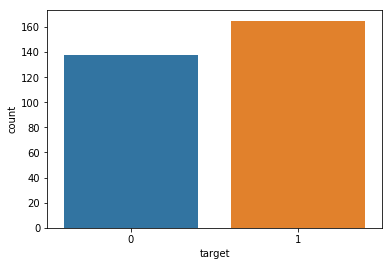

In [11]:
# 查看心脏病人数
sns.countplot(x = 'target', data = data)

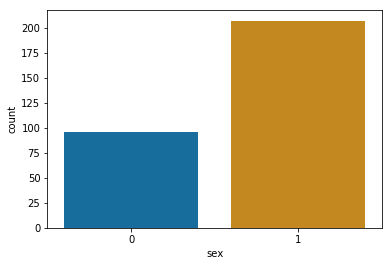

In [12]:
# 查看男女比例
sns.countplot(x = 'sex', data = data, palette='colorblind')

In [6]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

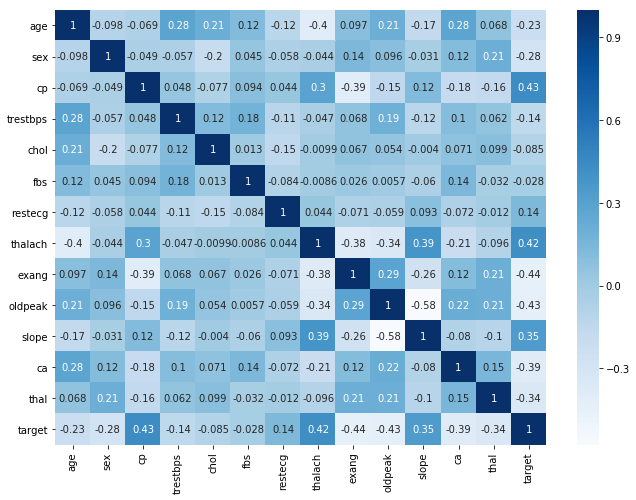

In [16]:
import matplotlib as plt

# 查看所有数据项之间的相关性，颜色越深相关性越强
fig, ax = plt.pyplot.subplots(figsize = (11, 8))
sns.heatmap(data.corr(), annot=True, cmap = 'Blues', ax=ax)
plt.pyplot.show()

In [18]:
# 将categorical variables 变为 dummy variables
a = pd.get_dummies(data["cp"], prefix = 'cp')
b = pd.get_dummies(data["restecg"], prefix = 'restecg')
c = pd.get_dummies(data["ca"], prefix = 'ca')
d = pd.get_dummies(data["thal"], prefix = 'thal')
e = pd.get_dummies(data["slope"], prefix = 'slope')

In [19]:
# 将上一步产生的哑变量加入数据集
data = pd.concat([data,a,b,c,d,e], axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [20]:
# 将原始的变量删去
data = data.drop(columns=['cp', 'restecg', 'thal','ca','slope'])
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,178,0,0.8,1,0,...,0,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,1,1,...,0,0,0,0,0,1,0,0,0,1


In [21]:
# 将决策变量取出
x = data.drop('target', axis = 1)
x.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,0,1,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,163,1,0.6,1,0,...,0,0,0,0,0,1,0,0,0,1


In [22]:
y = data['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# 将数据随机的分为测试组和结果组

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Logistic Regression

In [26]:
# 产生一个我们要用的分类器
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear')

# 放入训练数据
classifier.fit(x_train, y_train)

# 测试训练器classifier的训练结果
y_pred = classifier.predict(x_test)

# 产生测试结果,和用模型生成的结果的混肴矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[23,  4],
       [ 3, 31]], dtype=int64)

上面的结果显示
- 有23个1类的被正确的预测到了1类，有4个本来是1类的被分到了4类
- 有3个本来是1类的被分到了2类，有31个属于2类的被正确归类

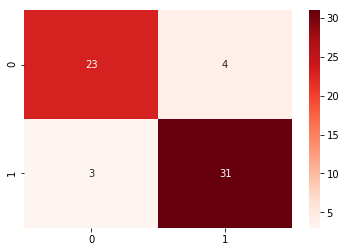

In [30]:
# 将上述的混淆矩阵转化为标准的DataFrame格式，然后作图展示
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Reds')
plt.pyplot.show()

In [31]:
# 输出正确率，精确率，和召回率
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy = ",accuracy_score(y_test,y_pred)*100,"%")
print("Precision = ",precision_score(y_test,y_pred)*100,"%")
print("Recall Score = ",recall_score(y_test,y_pred)*100,"%")

Accuracy =  88.52459016393442 %
Precision =  88.57142857142857 %
Recall Score =  91.17647058823529 %


In [32]:
# 计算敏感度和特异度
# 敏感度高代表漏诊率低
# 特异度高代表误诊率低

sensitivity = cm[1,1]/(cm[1,1] + cm[1,0])
print ("Sensitivity =",sensitivity)
specificity= cm[0,0]/(cm[0,0] + cm[0,1])
print("Specificity =",specificity)

Sensitivity = 0.9117647058823529
Specificity = 0.8518518518518519


In [33]:
# 计算AUC得分，绘制AUC曲线

from sklearn.metrics import roc_auc_score, roc_curve
auc=roc_auc_score(y_test,y_pred)
auc

0.8818082788671023

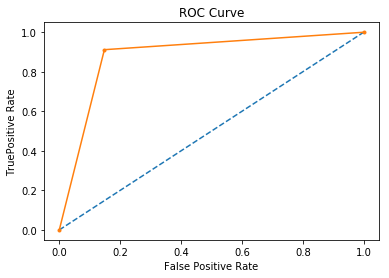

In [35]:
fpr,tpr,thresholds= roc_curve(y_test,y_pred)
plt.pyplot.plot([0,1],[0,1],linestyle="--")
plt.pyplot.plot(fpr,tpr,marker=".")
plt.pyplot.xlabel("False Positive Rate")
plt.pyplot.ylabel("TruePositive Rate")
plt.pyplot.title("ROC Curve")
plt.pyplot.show()

用逻辑回归的的效果还是不错的